In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
from pandas import read_csv


warnings.filterwarnings('ignore')

In [2]:
#import clean data from task 1
df=pd.read_csv('clean_data.csv', na_values= ['n/a','\s+','N/A'], delimiter=',')

In [3]:
df.describe()

,Year,Avg Min Temp *C,Yr Rain mm,Yield
count,120.000000,120.000000,120.000000,120.000000
mean,1999.500000,22.358333,1237.957333,1283.974583
std,11.591797,1.377465,379.252408,316.311611
min,1980.000000,19.700000,561.530000,773.810000
25%,1989.750000,21.275000,921.537500,1032.615000
50%,1999.500000,22.100000,1187.970000,1353.855000
75%,2009.250000,23.475000,1500.260000,1489.405000
max,2019.000000,25.000000,2031.850000,1768.870000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             120 non-null    int64  
 1   Location         120 non-null    object 
 2   Heat Wave        120 non-null    object 
 3   Dry Spell        120 non-null    object 
 4   Cold Wave        120 non-null    object 
 5   Wet Spell        120 non-null    object 
 6   Avg Min Temp *C  120 non-null    float64
 7   Yr Rain mm       120 non-null    float64
 8   Irrigation       120 non-null    object 
 9   Crop Type        120 non-null    object 
 10  Crop Damage      120 non-null    object 
 11  Yield            120 non-null    float64
 12  Observer         120 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 12.3+ KB


**1 Baseline Properties & Count Questions**

***1.1 Determine the following basic details about the data***

***1.1.1 What is the “Year” range (max, min) of the data collected?***

In [5]:
#use min max method on column "Year"
#answer: Min: 1980 Max: 2019

print("Min:",df["Year"].min(),"Max:",df["Year"].max())

Min: 1980 Max: 2019


***1.1.2 Are there any missing years in the data? If so, which?***

In [6]:
#use groupby method to display year and location
#answer: no missing value ( missing value is y=2020, location=Lake Meganhaven but it is the duplicated row, so it was dropped in task 1)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
Q1_2=df.groupby(["Year"])["Location"].count()
print(Q1_2)

Year
1980    3
1981    3
1982    3
1983    3
1984    3
1985    3
1986    3
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    3
1997    3
1998    3
1999    3
2000    3
2001    3
2002    3
2003    3
2004    3
2005    3
2006    3
2007    3
2008    3
2009    3
2010    3
2011    3
2012    3
2013    3
2014    3
2015    3
2016    3
2017    3
2018    3
2019    3
Name: Location, dtype: int64


***1.1.3 What are the “Locations” (values) in the data?***

In [7]:
#use value_counts()
#answer: Lake Meganhaven, East Stevenside, Davidfurt 
df['Location'].unique()

array(['Lake Meganhaven', 'East Stevenside', 'Davidfurt'], dtype=object)

***1.1.4 What are the “Crop Types” (values) in the data?***

In [8]:
#use value_counts()
#answer: Canola, Wheat, Soy
df['Crop Type'].unique()

array(['Canola', 'Wheat', 'Soy'], dtype=object)

***1.1.5 What is the range (min, max) of the temperature values?***

In [9]:
#answer: Min: 19.7 Max: 25.0
print("Min:", round(df["Avg Min Temp *C"].min(), 2), "Max:", round(df["Avg Min Temp *C"].max(), 2))

Min: 19.7 Max: 25.0


***1.1.6 What is the range (min, max) of the rainfall values?***

In [10]:
#answer: Min: 561.53 Max: 2031.85
print("Min:", round(df["Yr Rain mm"].min(), 2), "Max:", round(df["Yr Rain mm"].max(), 2))

Min: 561.53 Max: 2031.85


***1.2. Have all locations been used every year of data collection?***

In [11]:
#use group by to display year and location
#answer: yes
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
Q2=df.groupby(["Year","Location"])["Location"].count()
print(Q2)

Year  Location       
1980  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1981  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1982  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1983  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1984  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1985  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1986  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1987  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1988  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1989  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1990  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1991  Davidfurt          1
      East Stevenside    1
      Lake Meganhaven    1
1992  

***1.3 Do locations always have the same “Irrigated” value or does it change over the years?***

In [12]:
#use unique method
#answer: locations always have same ittigated value
Q3=df.groupby(["Location"])["Irrigation"].unique()
print(Q3)

Location
Davidfurt          [N]
East Stevenside    [Y]
Lake Meganhaven    [Y]
Name: Irrigation, dtype: object


***1.4 What is the total number of valid data entries (rows of data) you are expecting based on years of data collected and
number of site locations?***

***Is this the number you actually have? If not, why?***

In [13]:
Q4=df["Year"].nunique()
print("Total number to year record:",Q4 )
print("Total number of valid data entries:",Q4*3)
#answer: 120 is the same number of existing entries number in dataframe df

Total number to year record: 40
Total number of valid data entries: 120


***1.5 Explore the "Crop" data***

***1.5.1 What is the total occurrence (count used) of each crop type in the sample? (Table?)***

In [14]:
#use pivot table
Q5_1 = df.pivot_table(index=['Crop Type'],aggfunc= 'size')
print(Q5_1)

Crop Type
Canola    38
Soy       43
Wheat     39
dtype: int64


***1.5.2 What is the break-down (count used) of “crop type” at each location? (Plot? Table?)***

In [15]:
#use pivot table
Q5_2 = df.pivot_table(index=['Location','Crop Type'],aggfunc= 'size')
print(Q5_2)

Location         Crop Type
Davidfurt        Canola       12
                 Soy          17
                 Wheat        11
East Stevenside  Canola       10
                 Soy          14
                 Wheat        16
Lake Meganhaven  Canola       16
                 Soy          12
                 Wheat        12
dtype: int64


***1.5.3 What is the total yield for each crop type over the entire sample? (Yield total by type?)***

In [16]:
#use pivot table
Q5_3 = df.pivot_table(index=['Crop Type'],values=['Yield'],aggfunc= np.sum)
print(Q5_3)

              Yield
Crop Type          
Canola     62028.69
Soy        39572.52
Wheat      52475.74


***1.5.4 Has there been any changes in crop type usage over time? (Trends? Uniform? Plot?)***

In [17]:
Q5_4=df.groupby(["Year","Crop Type"])["Crop Type"].size()

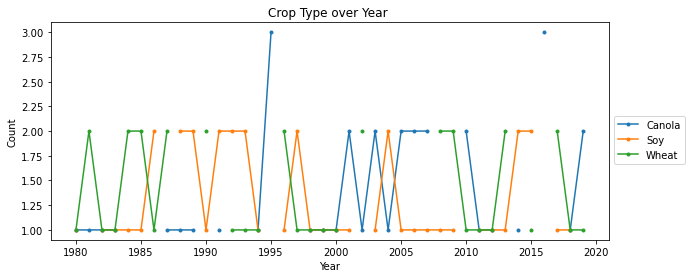

In [18]:
Q5_4.unstack().plot(marker='.', figsize=(10, 4))
plt.title("Crop Type over Year ")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

#answer: yes, the crop type usage had been changed over the time

***1.6 Staff members making obversions***

***1.6.1 Who was the longest serving staff member(s) making observations?***


In [19]:
Q6 = df.groupby(["Observer", "Location"])["Year"].agg(['max','min'])
Q6['Year diff'] = Q6['max']-Q6['min']
print(Q6)
Q6["Year diff"].idxmax()

#answer: Lisa Cisneros

                                        max   min  Year diff
Observer              Location                              
Alexis Griffith       East Stevenside  2004  2002          2
Alicia Gray           Lake Meganhaven  2006  2003          3
Alyssa Garcia         East Stevenside  1986  1985          1
Angela Burton         Lake Meganhaven  2007  2007          0
Anthony Drake         Davidfurt        1984  1983          1
Anthony Potter        East Stevenside  2009  2005          4
Ashley Soto           Lake Meganhaven  2014  2012          2
Brad Nunez            East Stevenside  1984  1984          0
Brandon Sandoval      Lake Meganhaven  2017  2016          1
Brandon Valdez        East Stevenside  2019  2019          0
Brenda Tran           Davidfurt        1987  1985          2
Brian Fernandez       Davidfurt        1988  1988          0
Casey Hernandez       East Stevenside  1996  1993          3
Christina Walker      Davidfurt        1982  1982          0
Christopher Rodriguez Ea

('Lisa Cisneros', 'Davidfurt')

***How many years and at what location?***

In [20]:
# Retrieve the entire row based on the index of max Year diff
Q6_max = Q6.loc[Q6["Year diff"].idxmax()]
print(Q6_max)

#answer: 5 years at Davidfurt

max          2008
min          2003
Year diff       5
Name: (Lisa Cisneros, Davidfurt), dtype: int64


***1.6.2 Did any staff member join again after they first performed the role?***

In [21]:
print( Q6.loc[Q6["Year diff"]>0])
#answer: yes

                                    max   min  Year diff
Observer          Location                              
Alexis Griffith   East Stevenside  2004  2002          2
Alicia Gray       Lake Meganhaven  2006  2003          3
Alyssa Garcia     East Stevenside  1986  1985          1
Anthony Drake     Davidfurt        1984  1983          1
Anthony Potter    East Stevenside  2009  2005          4
Ashley Soto       Lake Meganhaven  2014  2012          2
Brandon Sandoval  Lake Meganhaven  2017  2016          1
Brenda Tran       Davidfurt        1987  1985          2
Casey Hernandez   East Stevenside  1996  1993          3
Cynthia Jones     East Stevenside  1989  1987          2
Daniel Miller     Davidfurt        1993  1992          1
Donald Pena       Davidfurt        1991  1989          2
Ebony Thompson    East Stevenside  1992  1990          2
Eric Le           East Stevenside  1983  1980          3
Jamie Johnson     Davidfurt        2002  2001          1
Jeffery Cochran   Lake Meganhav

***2.General Relationships***

Text(0.5, 1.0, 'Correlation Map')

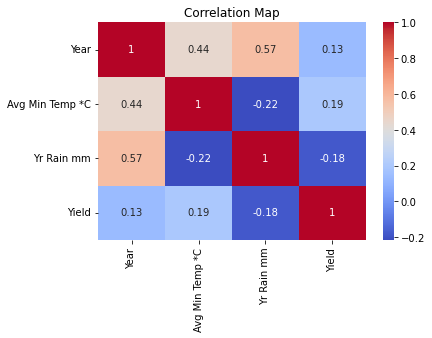

In [22]:
#use a correlation heatmap to explore the preliminary relationship between numerical columns
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm').set_title('Correlation Map')

***2.1 Is there a relationship between temperature and yield?***

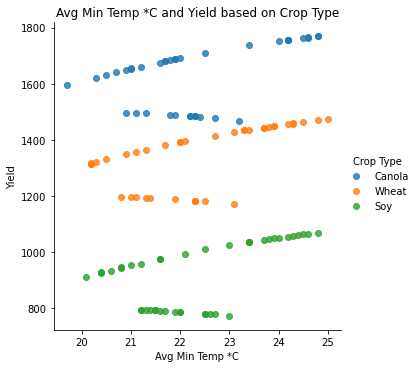

In [23]:
sns.lmplot(x='Avg Min Temp *C', y='Yield', data=df, hue='Crop Type', fit_reg=False)
plt.title("Avg Min Temp *C and Yield based on Crop Type")
plt.show()

***Is there a different between the irrigated and non-irrigated crops?***

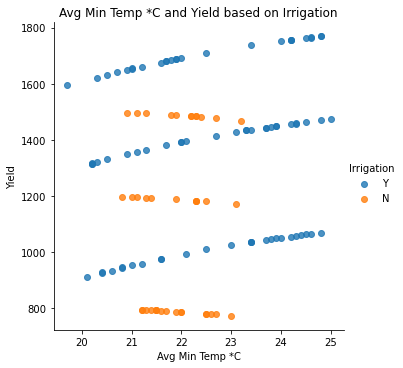

In [24]:
sns.lmplot(x='Avg Min Temp *C', y='Yield', data=df, hue='Irrigation', fit_reg=False)
plt.title("Avg Min Temp *C and Yield based on Irrigation")
plt.show()

From the plot "Avg Min Temp *C and Yield based on Crop Type" and "Avg Min Temp *C and Yield based on Irrigation", the answer is yes. There is a relationship between temperature and yield. Higher temperater with the location of irrigation contributes to a higher yield

***2.3 Is there a difference in yield expectations for specific crop types?***

***Compare both the general outcomes as well as the relationship at specific locations***

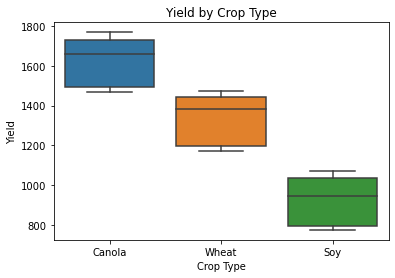

In [25]:
sns.boxplot(x='Crop Type', y='Yield', data=df)
plt.title("Yield by Crop Type")
plt.show()

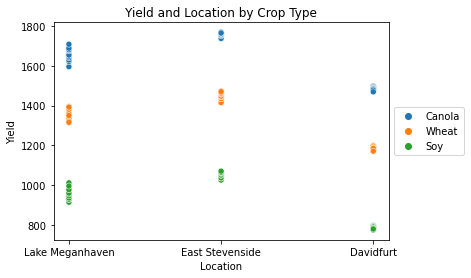

In [26]:
sns.scatterplot(x='Location', y='Yield', hue='Crop Type', data=df)
plt.title("Yield and Location by Crop Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the figures, it is evident that different types of plants produce  different yield quantities. Canola leads in terms of yield, followed by wheat and soy respectively. Additionally, the crop yield varies among different locations, East Stevenside provides the highest yield followed by Lake Maganhaven and Davidfurt.

***2.4 Is there a difference in yield trends (over time) at different locations?***

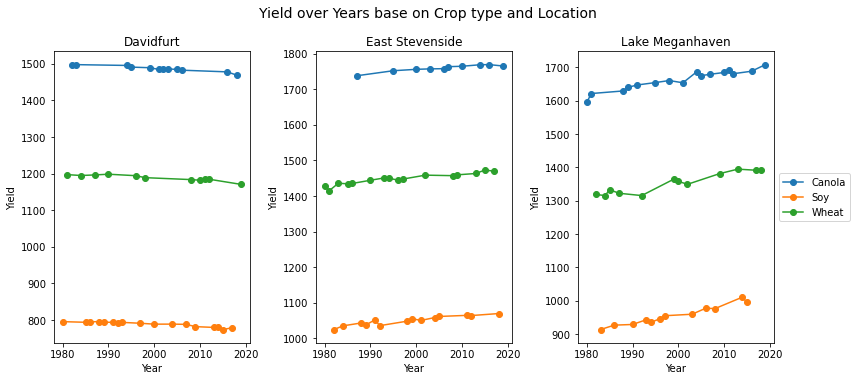

In [27]:
Davidfurt = df[df['Location'] == 'Davidfurt'].groupby('Crop Type')
Stevenside = df[df['Location'] == 'East Stevenside'].groupby('Crop Type')
Meganhaven = df[df['Location'] == 'Lake Meganhaven'].groupby('Crop Type')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))


for crop, data in Davidfurt:
    x = data['Year']
    y = data['Yield']
    ax[0].plot(x, y, marker='o', label=crop) 

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Yield')
ax[0].set_title('Davidfurt')



for crop, data in Stevenside:
    x = data['Year']
    y = data['Yield']
    ax[1].plot(x, y, marker='o', label=crop)

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Yield')
ax[1].set_title('East Stevenside')



for crop, data in Meganhaven:
    x = data['Year']
    y = data['Yield']
    ax[2].plot(x, y, marker='o', label=crop)

ax[2].set_xlabel('Year')
ax[2].set_ylabel('Yield')
ax[2].set_title('Lake Meganhaven')



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.suptitle('Yield over Years base on Crop type and Location',y=1.05,fontsize=14)
plt.show()


The yield trends over time at East Stevenside and Lake Meganhaven are higher, but there is a lower trend when considering yield at Davidfurt.

***2.5 What is the location that has performed best over the entire collection time?***


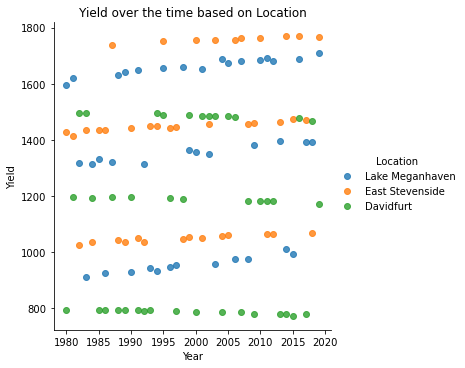

In [28]:
sns.lmplot(x='Year', y='Yield', data=df, hue='Location', fit_reg=False)
plt.title("Yield over the time based on Location")
plt.show()

#Answer: East Meganhaven

**2.6 What is the crop type that has performed best over the entire collection time?**


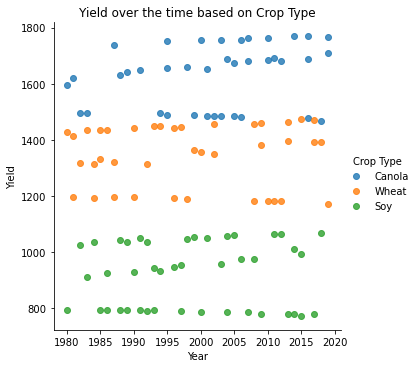

In [29]:
sns.lmplot(x='Year', y='Yield', data=df, hue='Crop Type', fit_reg=False)
plt.title("Yield over the time based on Crop Type")
plt.show()

#Answer: Canola

***3. Event Relationships***

***3.1 Show appropriate plots of Dry Spell and Heat Wave events to determine***



In [30]:
df['Heat Wave'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
df['Dry Spell'].unique()

array(['N', 'Y'], dtype=object)

***Which locations have had the most and least events, respectively?***

In [32]:
heatwave=df[df['Heat Wave']=='Y'].groupby(['Location'])['Heat Wave'].count()
print(heatwave)
#answer: most event is Lake Meganhaven, leat event is Davidfurt

Location
Davidfurt           1
East Stevenside    17
Lake Meganhaven    19
Name: Heat Wave, dtype: int64


In [33]:
dryspell=df[df['Dry Spell']=='Y'].groupby(['Location'])['Dry Spell'].count()
print(dryspell)
#answer: every location has same event number

Location
Davidfurt          2
East Stevenside    2
Lake Meganhaven    2
Name: Dry Spell, dtype: int64


***Is there a relationship to temperature, rainfall, yield or year?***

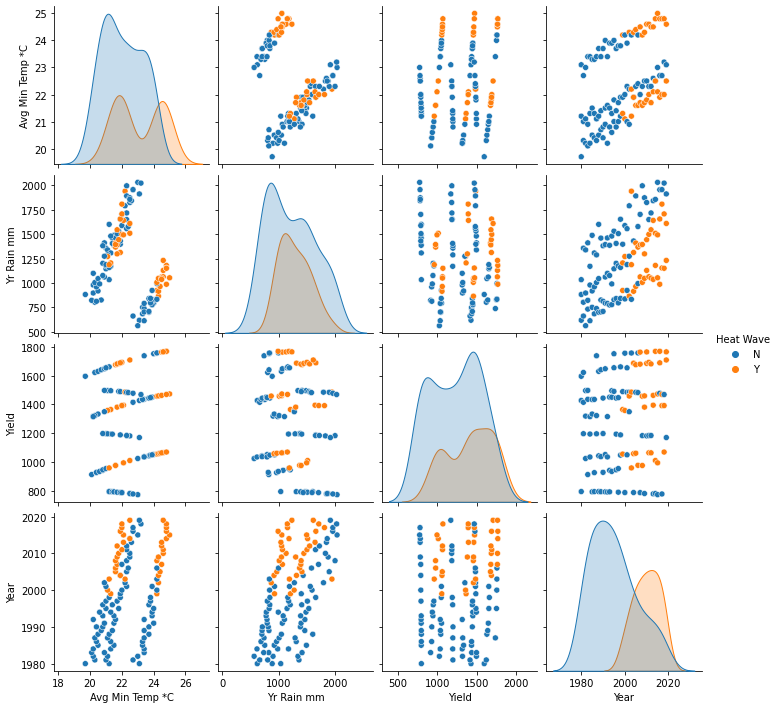

In [34]:
temp_rain_yeild_year=df[["Avg Min Temp *C","Yr Rain mm","Yield","Year","Crop Type","Location","Heat Wave","Dry Spell"]]
sns.pairplot(data=temp_rain_yeild_year,hue="Heat Wave")
#answer: for Heat Wave event, the higher temperature relates to a higher yield.The higher temperature relates to higher rainfall. Additionally, rainfall and temperature are increasing over the time

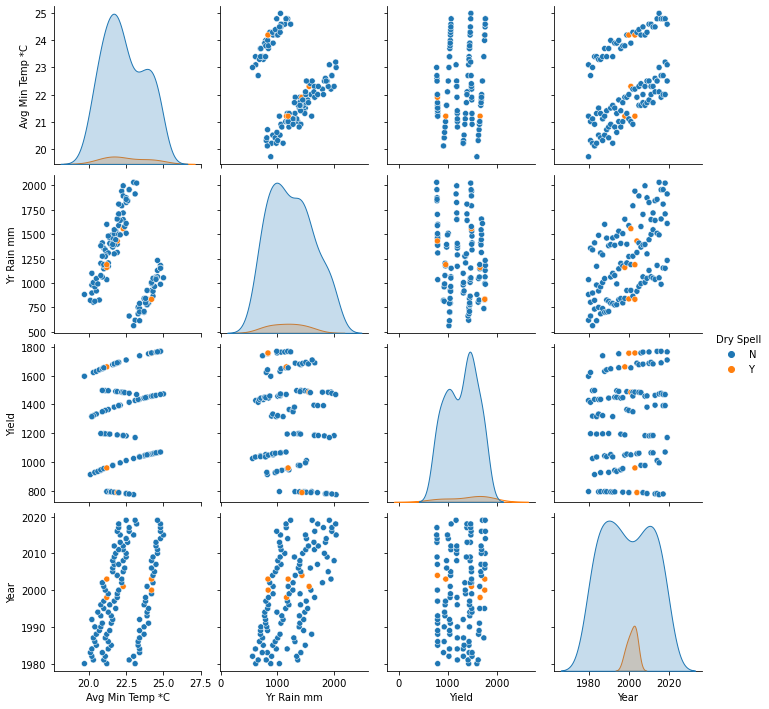

In [35]:
sns.pairplot(data=temp_rain_yeild_year,hue="Dry Spell")
#answer: for Dry Spell event, there are no significant relationship with other parameters.

***3.3 Show appropriate plots of Crop Damage events***

***Which location has had the most and least events, events?***

***Is there a relationship to temperature, rainfall, yield or year?***

In [36]:
cropdamage =df[df['Crop Damage']=='Y'].groupby(['Location'])['Crop Damage'].count()
print(cropdamage)

#answer: most event is  Davidfurt, least event is Lake Meganhaven

Location
Davidfurt          12
East Stevenside    11
Lake Meganhaven    10
Name: Crop Damage, dtype: int64


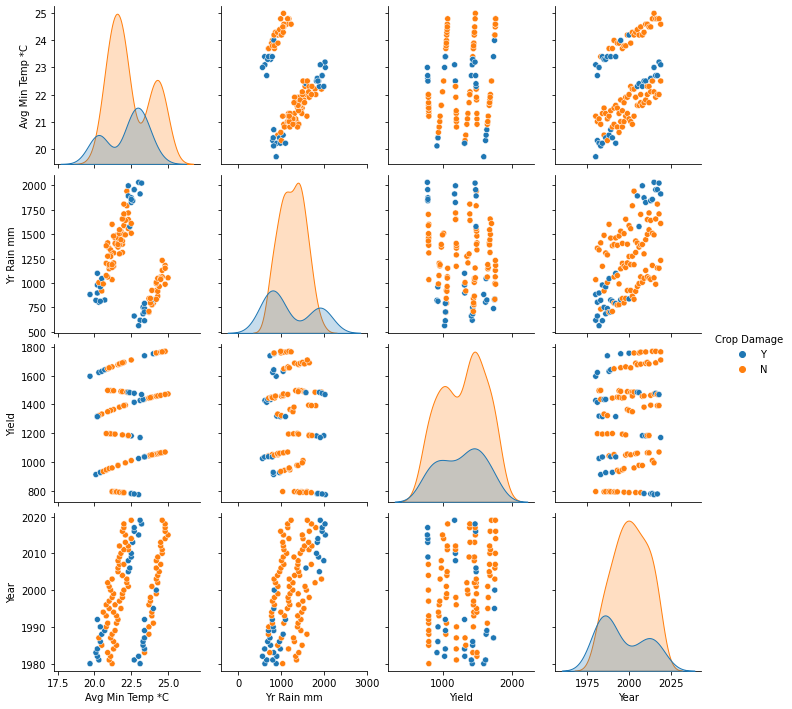

In [37]:
temp_rain_yeild_year_damage=df[["Avg Min Temp *C","Yr Rain mm","Yield","Year","Crop Type","Location",'Crop Damage']]
sns.pairplot(data=temp_rain_yeild_year_damage,hue="Crop Damage")
#answer: Crop damage relates to extreme temperatures, both hot and cold, as well as inadequate or excessive rainfall

***3.4 Can you find a way to present correlation between multiple events, in a clear table or matrix?***

In [38]:
#change categorical column (event columns) to numerical by replace method, then we can analyse the correlation map
event= ['Heat Wave',
 'Dry Spell',
 'Cold Wave',
 'Wet Spell',
 'Crop Damage']

for i in event:
    df[i + ' Numeric'] = df[i].replace(['Y', 'N'], [1, 0])


In [39]:
df.head()

,Year,Location,Heat Wave,Dry Spell,Cold Wave,Wet Spell,Avg Min Temp *C,Yr Rain mm,Irrigation,Crop Type,Crop Damage,Yield,Observer,Heat Wave Numeric,Dry Spell Numeric,Cold Wave Numeric,Wet Spell Numeric,Crop Damage Numeric
0,1980,Lake Meganhaven,N,N,Y,N,19.7,881.87,Y,Canola,Y,1595.59,Kiara Miller,0,0,1,0,1
1,1980,East Stevenside,N,N,Y,N,23.1,617.83,Y,Wheat,Y,1427.49,Eric Le,0,0,1,0,1
2,1980,Davidfurt,N,N,N,N,21.2,1033.66,N,Soy,N,795.43,Taylor Robinson,0,0,0,0,0
3,1981,Lake Meganhaven,N,N,Y,N,20.3,802.37,Y,Canola,Y,1621.85,Kevin Walters,0,0,1,0,1
4,1981,East Stevenside,N,N,Y,N,22.7,660.74,Y,Wheat,Y,1414.95,Eric Le,0,0,1,0,1


Text(0.5, 1.0, 'Event Correlation Map')

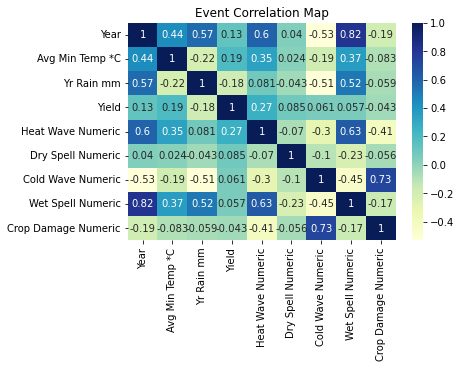

In [40]:
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu').set_title('Event Correlation Map')

***4. Temporal (Year) Relationships***

***4.2 Is there an observable relationship between rain data and the year?***

***For all locations combined?***
***At each location?***

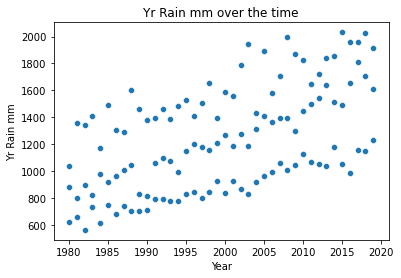

In [41]:
sns.scatterplot(x='Year', y='Yr Rain mm',data=df)
plt.title("Yr Rain mm over the time")
plt.show()

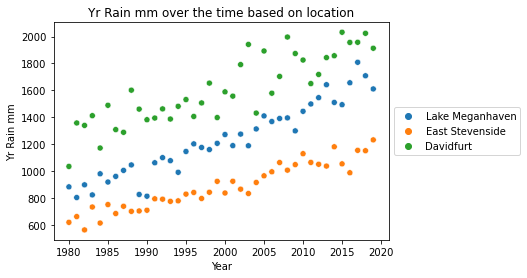

In [42]:
sns.scatterplot(x='Year', y='Yr Rain mm',data=df,hue='Location')
plt.title("Yr Rain mm over the time based on location")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The rainfall is increased over the time, and Davidfurt has the highest rainfall.


***4.3 Is there an observable relationship between temperature data and the year?***

***For all locations combined?***
***At each location?***

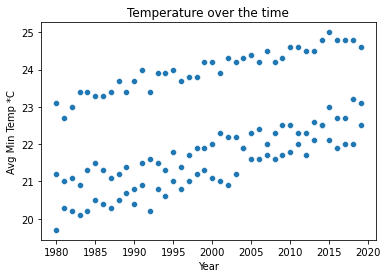

In [43]:
sns.scatterplot(x='Year', y='Avg Min Temp *C',data=df)
plt.title("Temperature over the time")
plt.show()

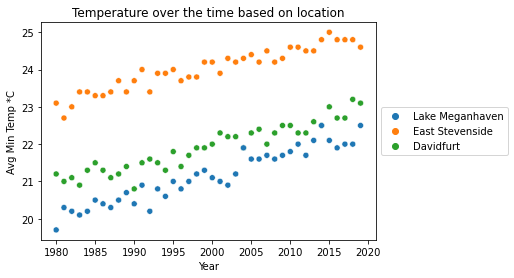

In [44]:
sns.scatterplot(x='Year', y='Avg Min Temp *C',hue='Location',data=df)
plt.title("Temperature over the time based on location")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The temperature is increased over the time, and East Stevenside has the highest temperature.